# Installations

In [1]:

%%capture
#Functions
from scipy.integrate import odeint, solve_ivp, lsoda
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from lmfit import Parameters, minimize, Model, report_fit, conf_interval
from sklearn.metrics import mean_squared_error
import numdifftools
from PIL import Image
from sklearn.metrics import r2_score
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



import scipy.optimize
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tkr
import scipy.stats as st
from scipy.stats import scoreatpercentile

colors = [ "#E69F00", "#56B4E9", "#009E73", "#CC79A7", "#999999","#F0E442","#0072B2", "#D55E00" ]
palette = sns.color_palette(colors)

sns.set_theme(context='notebook', style='ticks', font='Arial', 
              font_scale=1.7, 
              rc={"lines.linewidth": 1.8, 'axes.linewidth':2, 
                                  "xtick.major.width":2,"ytick.major.width":2}, 
              palette = palette)


import Cyclic_peptide as cy


In [2]:
def process_data(ic, excel_name, sheet_name, k0_input, condition_id):
    df = cy.load_data_frame(excel_name, sheet_name)
    dfs, cond = cy.sort_condition(df)
    df1 = dfs[condition_id]
    initial_conditions, params, tspan = cy.load_initial_conditions(df1, k0_input)
    data = df1[['F', "Ac", "E1", "E2", "E3"]].values
    t = sorted(df1['time'])
    return initial_conditions, params, tspan, data, t, df1

def fit_data(ic, excel_name, sheet_name, k0_input, condition_id, name_k, num_iterations=10):
    # Load data and preprocess
    initial_conditions, params, tspan, data, t,e = process_data(ic, excel_name, sheet_name, k0_input, condition_id)
    
    # Perform fitting
    for i in range(num_iterations):
        result = minimize(
            cy.error, params, args=(ic, t, data), nan_policy="omit", method="least_squares")
        params.update(result.params)  # Update parameters in each iteration

    """# Perform final fitting using RMSEerror
    result = minimize(
        cy.RMSEerror, params, args=(ic, t, data), nan_policy="omit", method="least_squares")
    params.update(result.params)  # Update parameters with final result"""
    
    # Extract parameter values
    k_values = pd.DataFrame({f"{name_k}": params.valuesdict().values()})
    
    simulated_data = cy.get_fitted_curve(ic, tspan = np.linspace(0, 2000, 10000), params = k_values.values.flatten())





    return k_values, e, simulated_data 

def fit_data_No_EDC(ic, excel_name, sheet_name, k0_input, condition_id, name_k, num_iterations=10):
    # Load data and preprocess
    initial_conditions, params, tspan, data, t,e = process_data(ic, excel_name, sheet_name, k0_input, condition_id)
    
    # Perform fitting
    for i in range(num_iterations):
        result = minimize(
            cy.error_no_EDC, params, args=(ic, t, data), nan_policy="omit", method="least_squares")
        params.update(result.params)  # Update parameters in each iteration

    """# Perform final fitting using RMSEerror
    result = minimize(
        cy.RMSEerror, params, args=(ic, t, data), nan_policy="omit", method="least_squares")
    params.update(result.params)  # Update parameters with final result"""
    
    # Extract parameter values
    k_values = pd.DataFrame({f"{name_k}": params.valuesdict().values()})
    
    simulated_data = cy.get_fitted_curve(ic, tspan = np.linspace(0, 2000, 10000), params = k_values.values.flatten())





    return k_values, e, simulated_data 

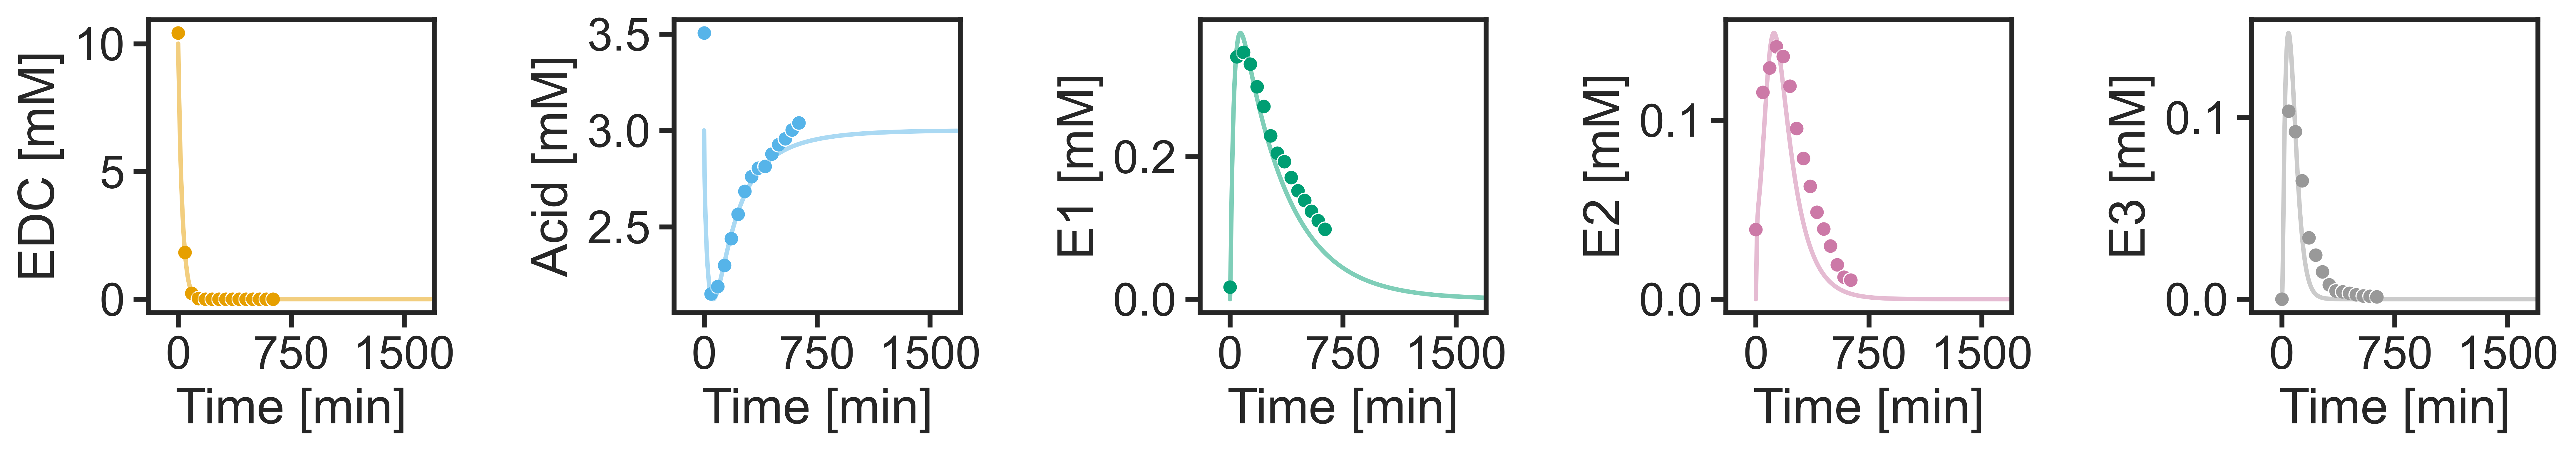

In [10]:
# 3 mM Acid and 10 mM EDC
ic = [10, 0, 3., 0, 0, 0, 0, 0]
excel_name = "template_depsipeptides_Fabi"
sheet_name = "Sheet1"
k0_input = 0.0045 # calculated elsewhere
condition_id = 0
name_k = "Ac-AYRGD-OH_1"
initial_conditions, params, tspan, data, t, experimental_data = process_data(ic = [10,0,3., 0, 0,0,0,0], 
                                                          excel_name = "template_depsipeptides_Fabi", 
                                                          sheet_name = "Sheet1", 
                                                          k0_input = 0.0045, 
                                                          condition_id=0)

results1 = fit_data(ic, excel_name, sheet_name, k0_input, condition_id, name_k)


fig, ax = cy.plot_fitted(results1[1], results1[2])
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))

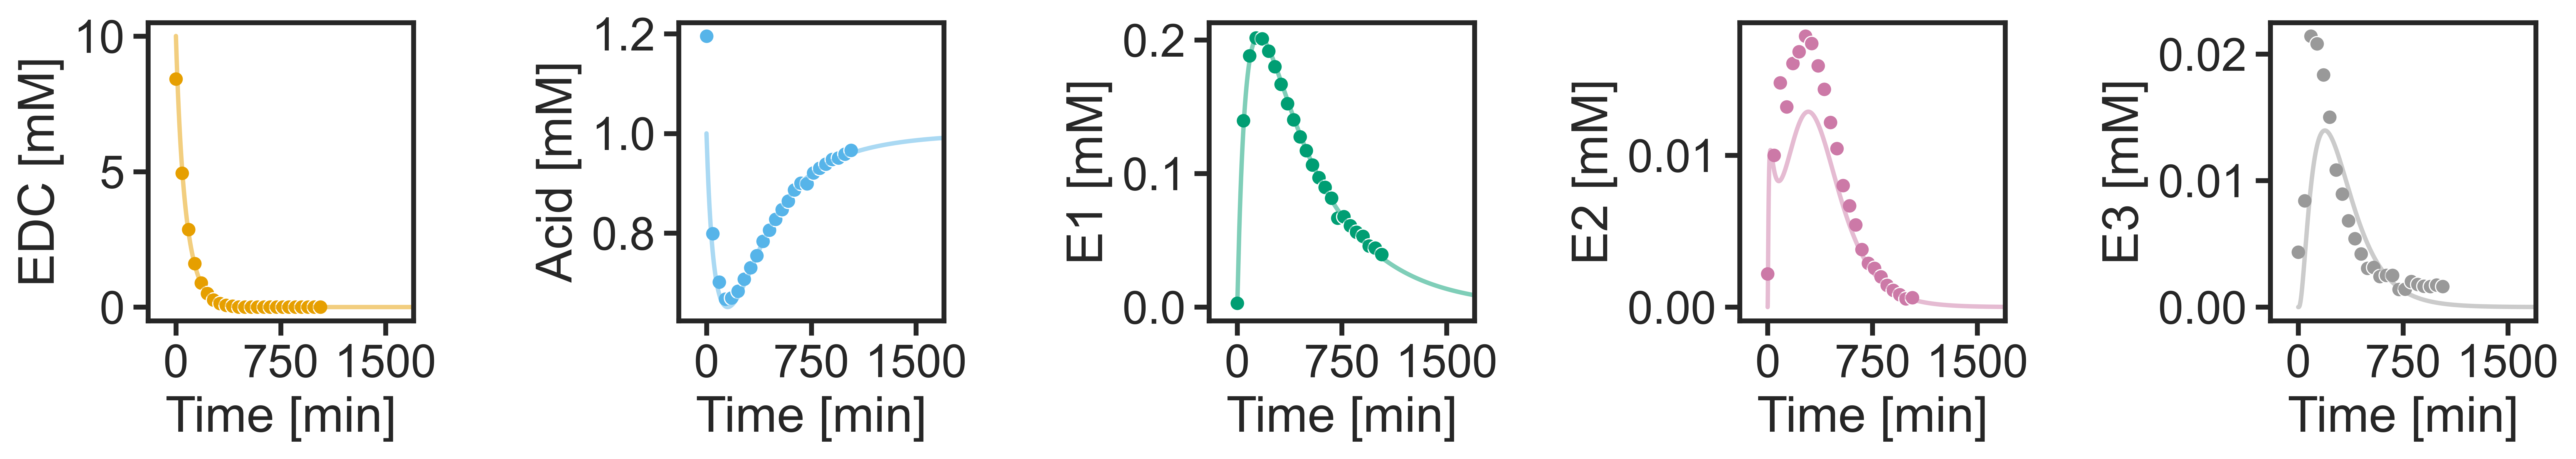

In [11]:
# 1 mM Acid and 10 mM EDC
ic = [10, 0, 1., 0, 0, 0, 0, 0]
excel_name = "template_depsipeptides_Fabi_1_10_Ac-AYRGD-OH"
sheet_name = "Sheet1"
k0_input = 0.0045
condition_id = 0
name_k = "Ac-AYRGD-OH_2"
initial_conditions, params, tspan, data, t, experimental_data = process_data(ic, 
                                                          excel_name, 
                                                          sheet_name, 
                                                          k0_input, 
                                                          condition_id)

results2 = fit_data(ic, excel_name, sheet_name, k0_input, condition_id, name_k)


fig, ax = cy.plot_fitted(results2[1], results2[2])
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))

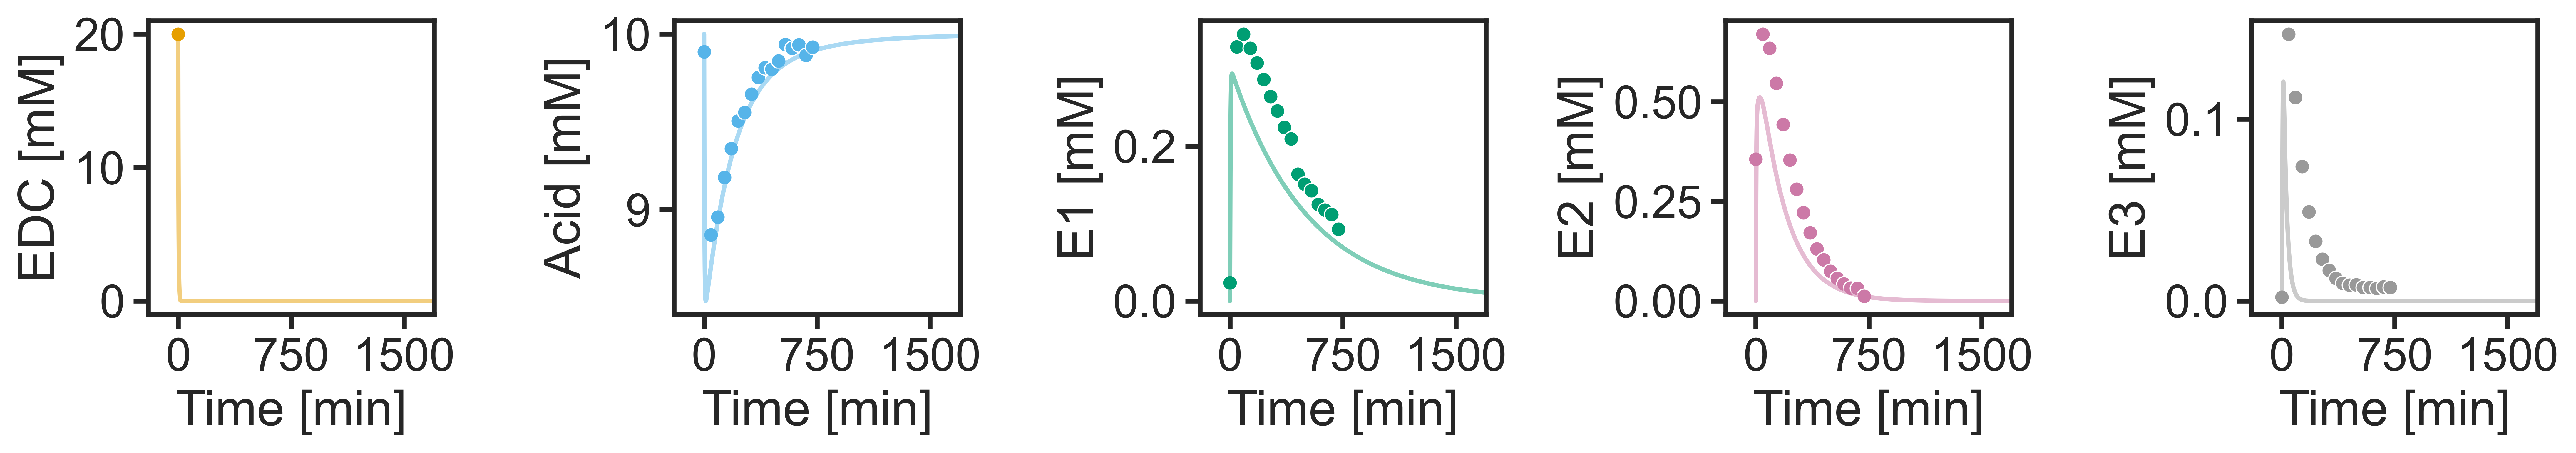

In [12]:
# 10 mM Acid and 20 mM EDC
ic = [20, 0, 10., 0, 0, 0, 0, 0]
excel_name = "template_depsipeptides_Fabi_10_20_Ac-AYRGD-OH"
sheet_name = "Sheet1"
k0_input = 0.0045 # calculated elsewhere
condition_id = 0
name_k = "Ac-AYRGD-OH_3"
initial_conditions, params, tspan, data, t, experimental_data = process_data(ic, 
                                                          excel_name, 
                                                          sheet_name, 
                                                          k0_input, 
                                                          condition_id)

results3 = fit_data_No_EDC(ic, excel_name, sheet_name, k0_input, condition_id, name_k)


fig, ax = cy.plot_fitted(results3[1], results3[2])
fig.dpi = 600
for i in ax:

    i.set(xlim = (-200, 1700), xticks = (0, 750, 1500))

In [7]:
import os 

# Define the name of the folder you want to create
folder_name = "Outcome"

# Check if the folder already exists
if not os.path.exists(folder_name):
    # If the folder doesn't exist, create it
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created successfully.")
else:
    print(f"Folder '{folder_name}' already exists.")

# Change the current working directory to the newly created folder
os.chdir(folder_name)

# Print the current working directory to verify the change
print(f"Current working directory changed to: {os.getcwd()}")


Folder 'Outcome' already exists.
Current working directory changed to: /Users/hsc/Documents/GitHub/Cyclic-peptide-kinetics/AYRGD/Outcome


In [8]:
k_values = pd.concat([results1[0], results2[0], results3[0]], axis = 1)
k_values.to_excel("k_values_Ac_AYRGD.xlsx", index = None)

In [9]:
names = ["00_10_3mM.xlsx","01_10_1mM.xlsx","02_20_10mM.xlsx"]
for i, j, n in zip([results1[1], results2[1], results3[1]], [results1[2], results2[2], results3[2]], names):

    i.to_excel(f"experimental_{n}")
    j.to_excel(f"simulated_{n}")
# Navigate back to the parent directory
os.chdir('..')